# Life Expectancy and GDP Data Analysis Project

This project is done by `@tylershienlim` and was a part of codecademy's **Data Scientist Analytics** Path portfolio project

Through this project, I aim to showcase my technical skill set in the following:
- Data Acquisition
- Data Visualization
- Hypothesis Testing
- Summarizing Quantitative Data
- Data Wrangling and Tidying
- Data Manipulation with Pandas

This project will investigate if there is a strong correlation between ***the economic output of a country and the life expectancy of its citizens***.

Here are a few questions that this project will seek to answer:

+ Has life expectancy increased over time in the six nations?
+ Has GDP increased over time in the six nations?
+ Is there a correlation between GDP and life expectancy of a country?
+ What is the average life expectancy in these nations?
+ What is the distribution of that life expectancy?


**Data sources**

- GDP Source: [World Bank](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD) national accounts data, and OECD National Accounts data files.

- Life expectancy Data Source: [World Health Organization](http://apps.who.int/gho/data/node.main.688)

## All Dependencies to be imported:

Importing all necessary modules that will be used in the project

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Load the Data

The data source is stored in `all_data.csv` and is loaded into a dataframe, `df`, using the `pandas` library

`df.head()` is used to examine the first 5 rows of the GDP dataset

In [2]:
df = pd.read_csv('all_data.csv')

In [3]:
df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


Using `df.describe()`, the summary statistics of the dataset is shown

There are 6 countries in the dataset - Chile, China, Germany, Mexico, USA, and Zimbabwe (further inspected using the `.unique()` function on the Country column)

The range of years included from this dataset is between 2000 and 2015 (Not very recent).



In [4]:
df.describe(include='all')

,Country,Year,Life expectancy at birth (years),GDP
count,96,96.000000,96.000000,9.600000e+01
unique,6,NaN,NaN,NaN
top,Chile,NaN,NaN,NaN
freq,16,NaN,NaN,NaN
mean,NaN,2007.500000,72.789583,3.880499e+12
std,NaN,4.633971,10.672882,5.197561e+12
min,NaN,2000.000000,44.300000,4.415703e+09
25%,NaN,2003.750000,74.475000,1.733018e+11
50%,NaN,2007.500000,76.750000,1.280220e+12
75%,NaN,2011.250000,78.900000,4.067510e+12


In [5]:
df.Country.unique()

array(['Chile', 'China', 'Germany', 'Mexico', 'United States of America',
       'Zimbabwe'], dtype=object)

## Clean the Data

1. Cleaning up the column name of `Life expectancy at birth (years)` to `life_expectancy`
2. Making all columns into string lowercase

This supports the typical pandas column naming convention of using *snake lowercase* (lowercase with underscore)

In [6]:
df = df.rename(str.lower, axis='columns')
df = df.rename(columns={'life expectancy at birth (years)': 'life_expectancy'})

In [7]:
df

,country,year,life_expectancy,gdp
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10
...,...,...,...,...
91,Zimbabwe,2011,54.9,1.209845e+10
92,Zimbabwe,2012,56.6,1.424249e+10
93,Zimbabwe,2013,58.0,1.545177e+10
94,Zimbabwe,2014,59.2,1.589105e+10


## Data Exploration

### Initial Data Exploration

The initial plots of GDP and Life expectancy of the dataset shows the skewedness in the distribution
- GDP is *skewed right*
- Life expectancy is *skewed left*

Based on the countries and timeline in this dataset, it could be understandable that the distribution of GDP skews right
- the dataset ranges from the 2000s (**economic recession**)
- Chile, Mexico, and Zimbabwe are considered **LEDCs** (*Less Economically Developed Country*)
- Gap of life expectancy between 60 - 70 years

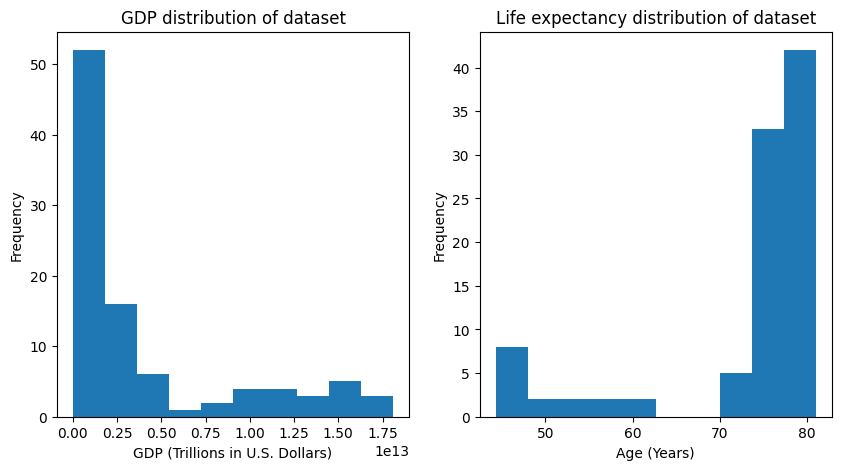

In [8]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
ax1.hist(df.gdp)
ax1.set_title('GDP distribution of dataset')
ax1.set_xlabel('GDP (Trillions in U.S. Dollars)')
ax1.set_ylabel('Frequency')

ax2.hist(df.life_expectancy)
ax2.set_title('Life expectancy distribution of dataset')
ax2.set_xlabel('Age (Years)')
ax2.set_ylabel('Frequency')

plt.show()

**Average GDP By Country**

In the initial efforts of data exploration, the dataset has been transformed to plot the figure shown below

Observations
- USA is heads and heels above all countries
- China leads in second with the highest GDP but is still miles behind USA
- Chile and Zimbabwe are barely shown on the chart with Zimbabwe almost being non-existent

In [9]:
df_gdp_mean = df[['country', 'gdp']].copy()
df_gdp_mean.groupby(['country']).mean()

,gdp
country,
Chile,1.697888e+11
China,4.957714e+12
Germany,3.094776e+12
Mexico,9.766506e+11
United States of America,1.407500e+13
Zimbabwe,9.062580e+09


c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


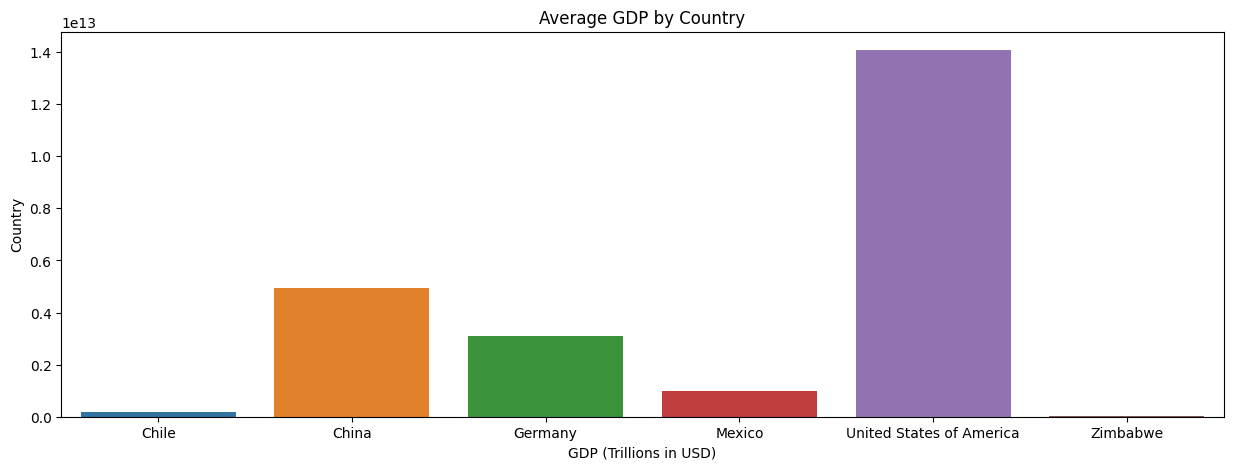

In [10]:
plt.figure(figsize=(15, 5))
sns.barplot(df_gdp_mean, x='country', y='gdp', errorbar=None)
plt.title('Average GDP by Country')
plt.xlabel('GDP (Trillions in USD)')
plt.ylabel('Country')
plt.show()

**Average Life Expectancy By Country**

The dataset has also been transformed to explore the average life expectancy by country

Observations
- Zimbabwe has the lowest life expectancy, having both lowest mean GDP and life expectancy out of all countries
- Life expectancy of Germany is the highest
- Unlike for mean GDP, life expectancy among countries are fairly close

In [11]:
df_life_mean = df[['country','life_expectancy']].copy()
df_life_mean.groupby(['country']).mean()

,life_expectancy
country,
Chile,78.94375
China,74.26250
Germany,79.65625
Mexico,75.71875
United States of America,78.06250
Zimbabwe,50.09375


c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


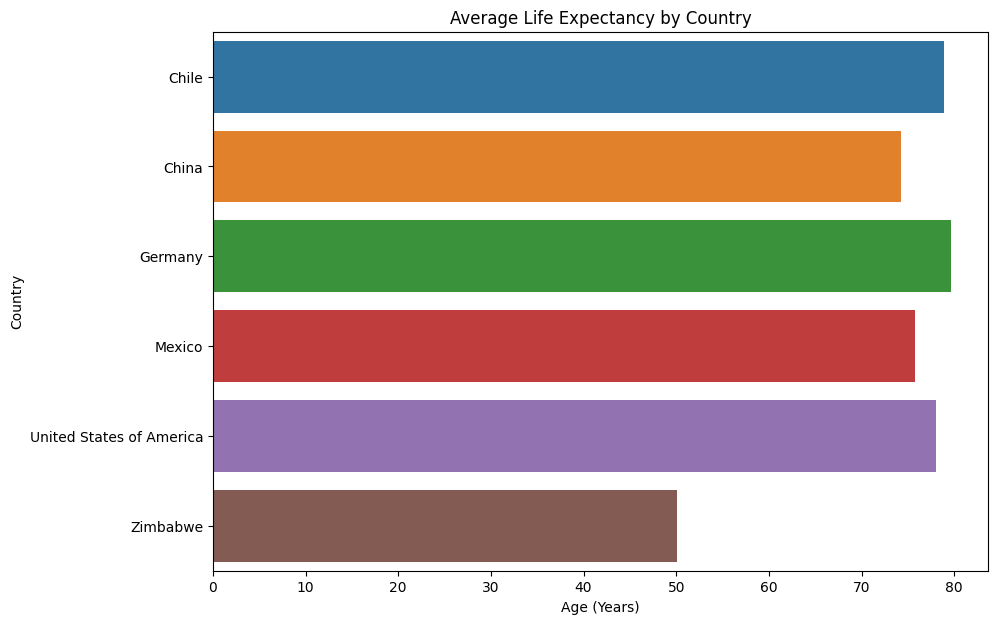

In [12]:
plt.figure(figsize=(10, 7))
sns.barplot(df_life_mean, x='life_expectancy', y='country', errorbar=None)
plt.title('Average Life Expectancy by Country')
plt.xlabel('Age (Years)')
plt.ylabel('Country')
plt.show()

### Data Exploratory Plots

In an effort to gain more insight into the dataset, more visualizations have been plotted in hopes of answering the data-driven questions at the start of this project

- The violin plot of the life expectancy distribution by country


c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


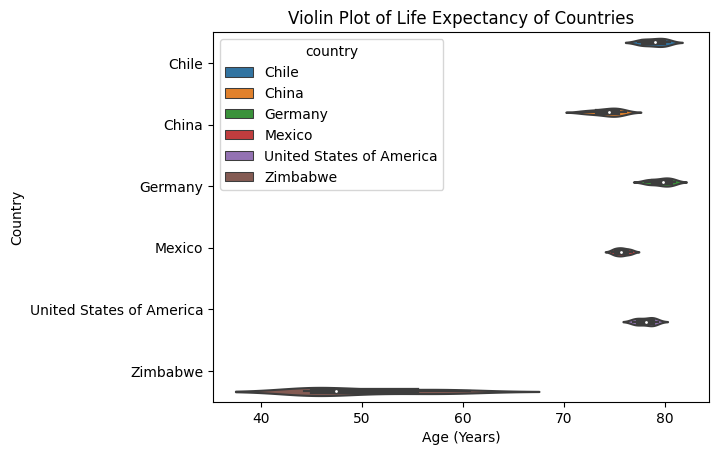

In [18]:
sns.violinplot(data=df, x='life_expectancy', y='country', hue='country')
plt.title('Violin Plot of Life Expectancy of Countries')
plt.xlabel('Age (Years)')
plt.ylabel('Country')
plt.show()

Line plot of change of life expectancy in all six nations across the years.

Observations
- Zimbabwe had the greatest increase in life expectancy among all six nations
- However, Zimbabwe still has the lowest life expectancy
- The other 5 nations have relatively similar increases 

c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-pa

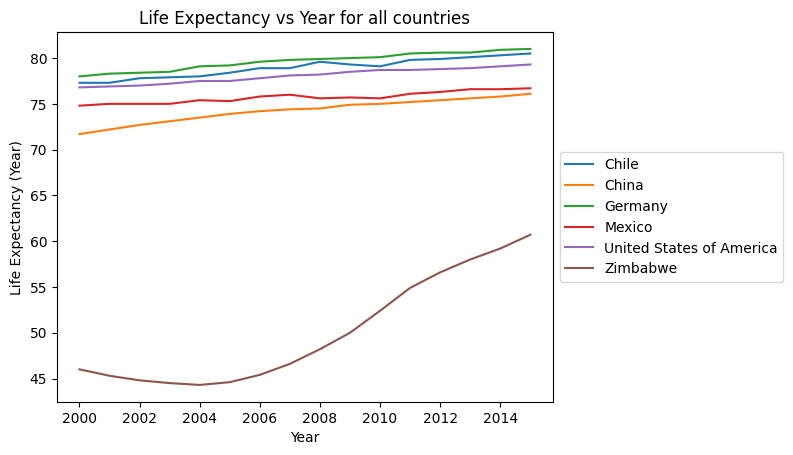

In [72]:
sns.lineplot(df, x='year', y='life_expectancy', hue='country')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.title('Life Expectancy vs Year for all countries')
plt.xlabel('Year')
plt.ylabel('Life Expectancy (Year)')
plt.show()

The initial line plot of all countries in a single graph showed the big picture.
To better examine the change in life expectancy across the years for all six nations, the facet grid of line graphs mapping Life Expectancy by country was used

Observations:
- Zimbabwe had a dip (decrease) between 2000 and 2005, unable to gather the reasoning for so from just this dataset
- Chile and Mexico both has dips across the years
- Mexico's dip was quit significant
- Without further visualization of individual countries, these minor but significant details could have been missed easily

c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-pa

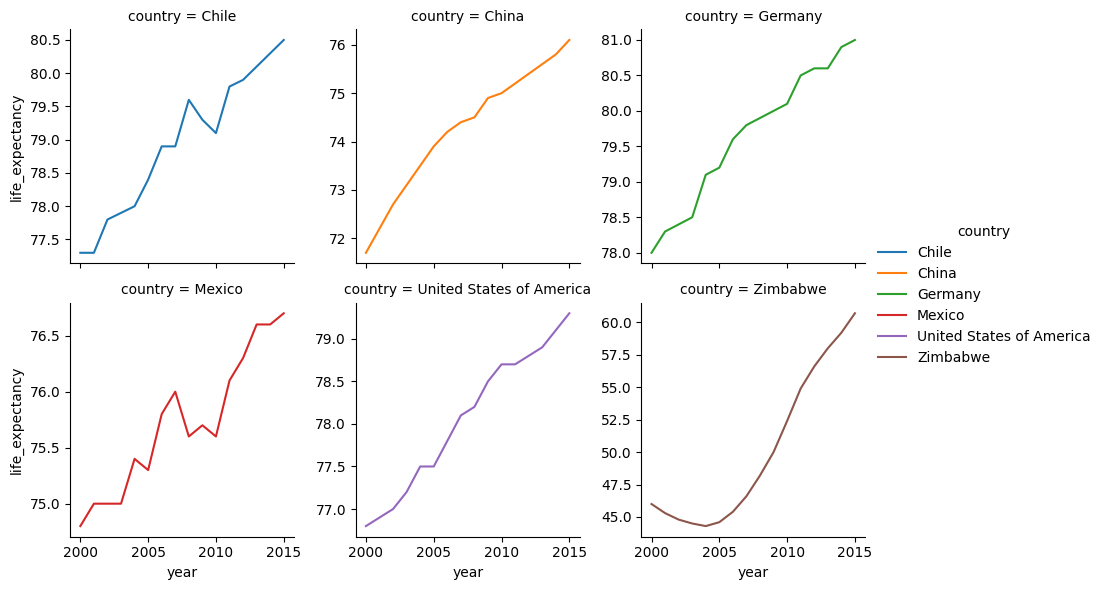

In [46]:
facet_life = sns.FacetGrid(data=df, col='country', hue='country',
                  col_wrap=3, sharey=False)
facet_life.map(sns.lineplot, 'year','life_expectancy').add_legend()
plt.show()

Line plot of change of GDP in all six nations across the years.

Initial Observations
- China and USA has the biggest GDP increase
- Chile and Zimbabwe's seems to have increase but very minorly
- Germany has stagnated it's GDP increase

c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-pa

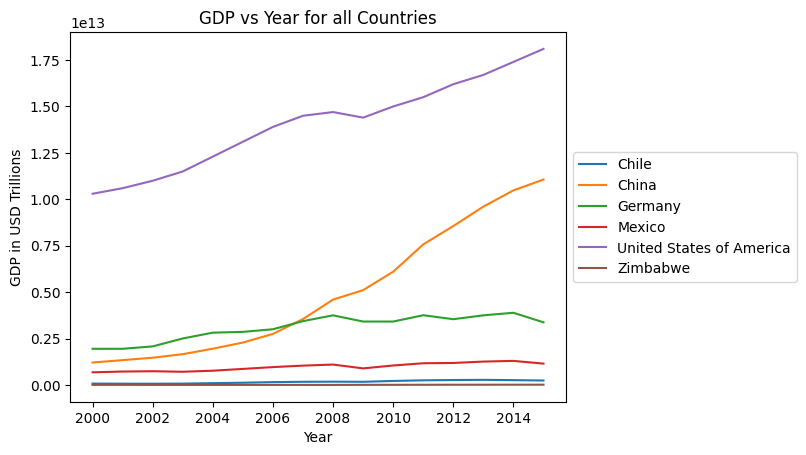

In [71]:
sns.lineplot(df, x='year', y='gdp', hue='country')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.title('GDP vs Year for all Countries')
plt.xlabel('Year')
plt.ylabel('GDP in USD Trillions')
plt.show()

To better examine the change in life expectancy across the years for all six nations, the facet grid of line graphs mapping GDP by country was used

c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-pa

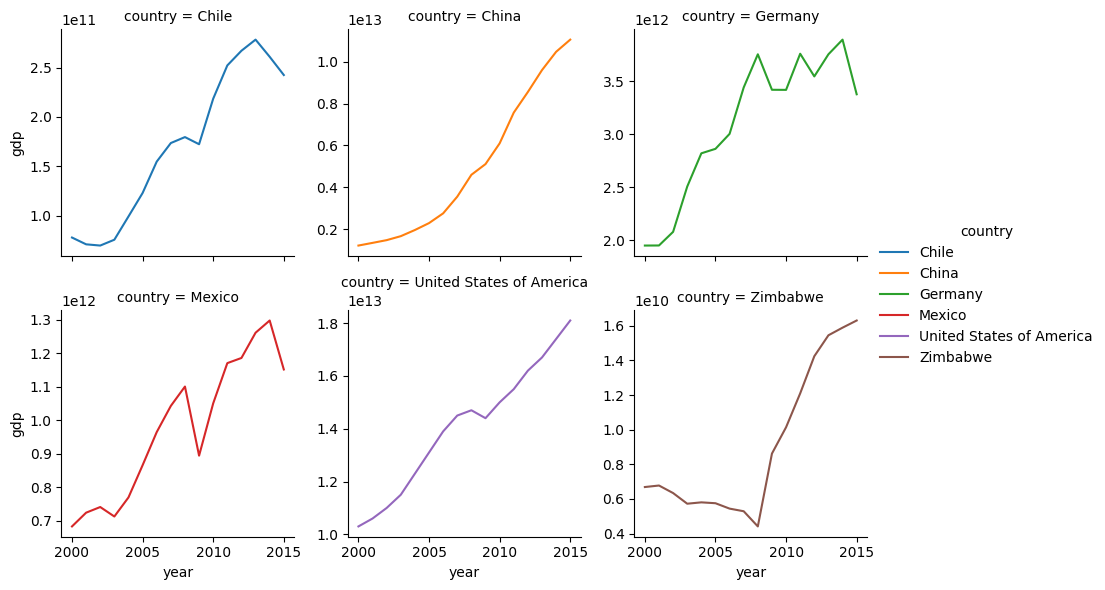

In [60]:
facet_gdp_line = sns.FacetGrid(df, col='country', hue='country',
                               col_wrap=3, sharey=False)
facet_gdp_line.map(sns.lineplot, 'year', 'gdp').add_legend()

plt.show()

The facet grid of scatter graphs mapping GDP as a function of Life Expectancy by country

Observations:
- There is a positive correlation between all countries for GDP against life expectancy

c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-pa

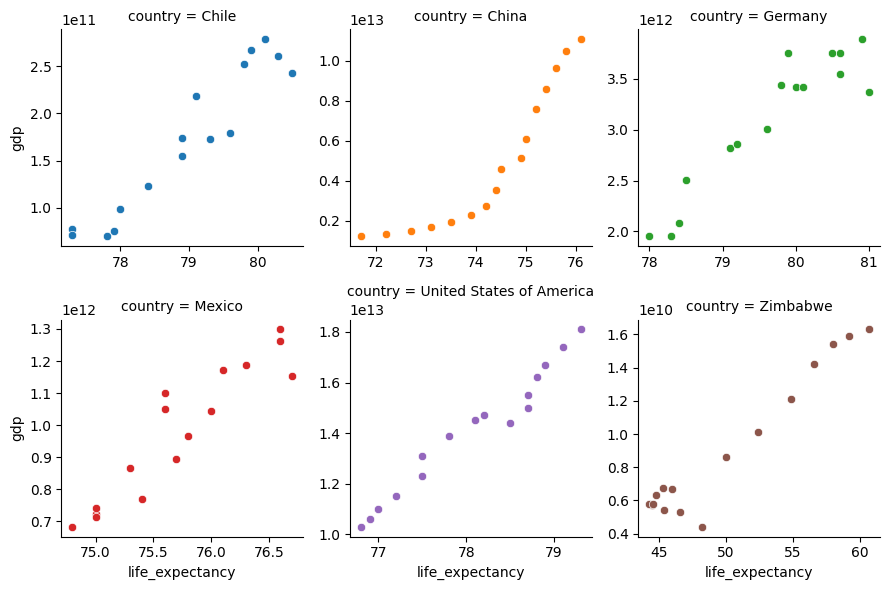

In [54]:
facet_gdp_life = sns.FacetGrid(df, col='country', hue='country',
                               col_wrap=3, sharex=False, sharey=False)
facet_gdp_life.map(sns.scatterplot, 'life_expectancy', 'gdp')
plt.show()

## Conclusions

+ Has life expectancy increased over time in the six nations?
    - Yes, all six nations have increased life expectancy over time
    - Zimbabwe Country has the greatest life expectancy increase in the dataset

+ What is the distribution of that life expectancy?
    - Skewed left

+ What is the average life expectancy in these nations?
    - Zimbabwe has the lowest average life expectancy of 50
    - The remaining 5 countries has a similar average life expectancy around 75+

+ Has GDP increased over time in the six nations?
    - Yes, GDP has increased in six nations over time
    - China has the greatest GDP increase in the dataset

+ Is there a correlation between GDP and life expectancy of a country?
    - Yes
    - Positive correlation in all six nations

## Further Research

The study wanted to explore what happened in China in the past 10 years that caused the GDP to increase so drastically.

This [Forbes article](https://www.forbes.com/sites/peterpham/2018/03/06/is-there-a-secret-growth-hormone-added-to-chinas-economy/#40869ba53f13) describes China's unmatched GDP growth in the past decades were due to it's large population, newly available capital and manufacturing efficiency. The study can ascertain that the findings in the data matches the real world findings for GDP growth in China.